# Retail Sales Analysis using Python

This project explores historical retail sales data using data analytics techniques in Python. It includes Exploratory Data Analysis (EDA), customer segmentation using RFM analysis, and basic time series insights.


## Objective

The main objective of this project is to analyze the sales data of a retail company to:

- Identify key trends and patterns in sales and profits  
- Understand how discount affects profitability  
- Discover high-value customers using RFM segmentation  
- Uncover seasonal sales trends through time series analysis  
- Provide actionable insights for business strategy


**LIBRARIES**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This imports the 4 major libraries:
pandas            -for data handling (tables, filtering, etc.)
numpy             - for numerical operations
matplotlib.pyplot -for plotting graphs
seaborn           -for stylish visualizations

**LOAD DATA**

In [63]:
df=pd.read_csv("D:/jupyter notebook/Sample - Superstore.csv",encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Load the CSV file into DataFrame df
encoding ='ISO-8859-1' is used because the file has special characters.
df.head() shows the first 5 rows.

**DATASET INFO**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Gives:
column names
Data types (int,float,object)
Non-null count for each column 
Helps in checking if data is clean or has missing values.

In [65]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Gives:
Count, mean, std deviation, min, max
For all numerical columns like Sales, Quantity, Profit
Good for initial understanding of data spread.

**CHECK FOR NULL VALUES**

In [66]:
df.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Returns True wherever the cell is null-not useful alone.

**COUNT OF NULL VALUES**

In [67]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Shows total number of nulls in each column

**CHECK FOR DUPLICATES**

In [68]:
df.duplicated().sum()

0

Shows how many rows are exact duplicates in the dataset.

**CLEAN DATA**

In [69]:
df.drop_duplicates(inplace=True)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


Removes all duplicate rows permanently using inplace=True.
Then displays the cleaned DataFrame

**EXPLORATORY DATA ANALYSIS**

**Category-wise Orders**

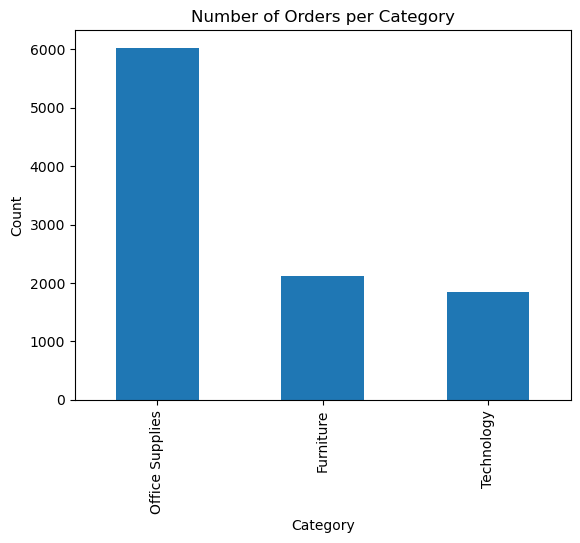

In [70]:
df['Category'].value_counts().plot(kind='bar')
plt.title('Number of Orders per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

- The most ordered category is Office Supplies, followed by Furniture and Technology.
- Technology generates higher profits despite fewer orders.

**Sales by Region**

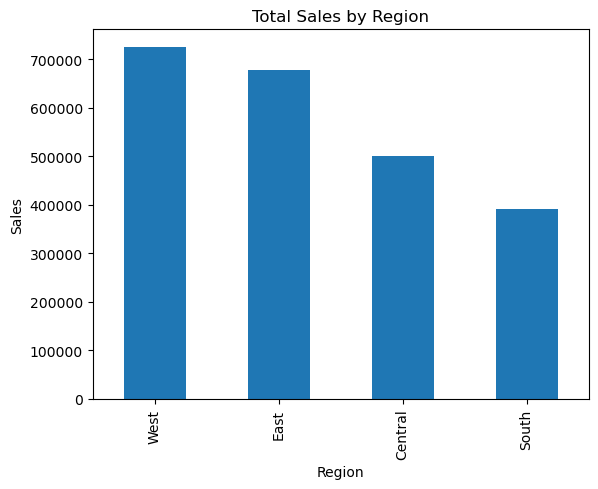

In [71]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar')
plt.title('Total Sales by Region')
plt.ylabel('Sales')
plt.show()

- *West* *East* and *Central* regions contribute the most to sales and profits.
- *South* region shows lower profits — needs strategy optimization.

**Profit by State**

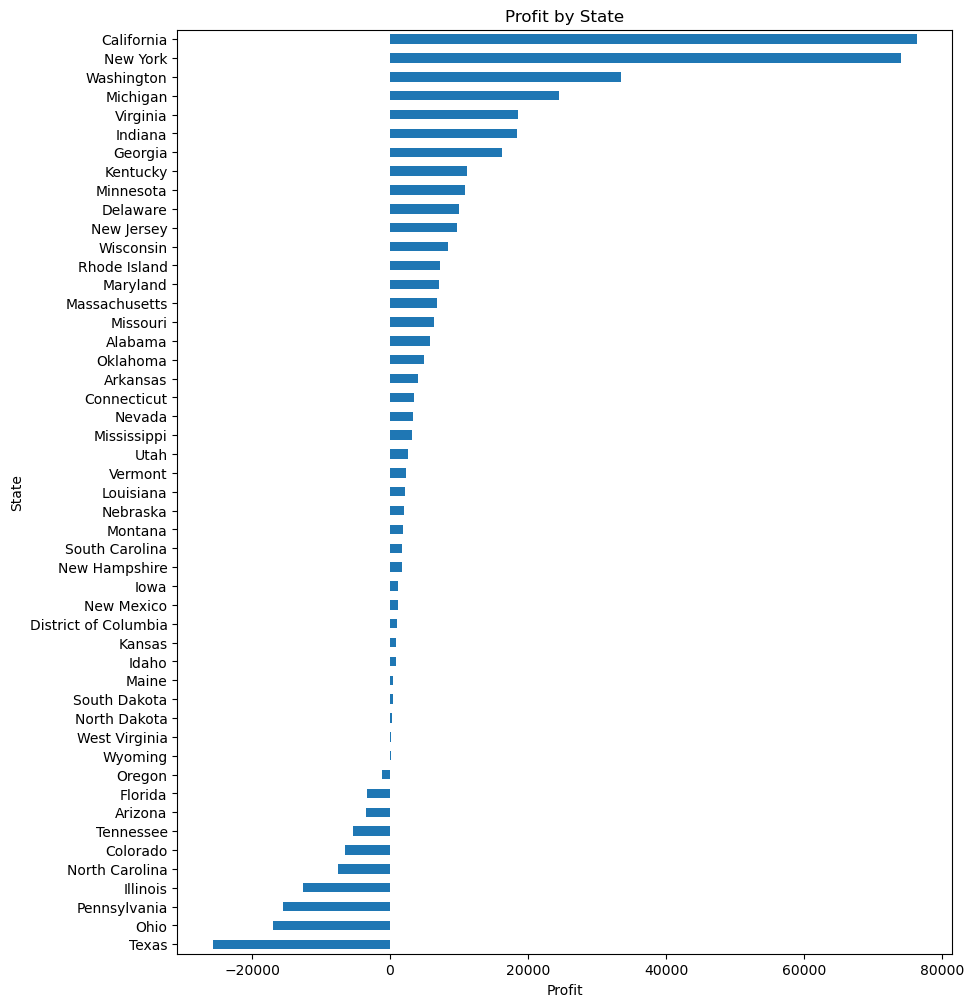

In [72]:
state_profit = df.groupby('State')['Profit'].sum().sort_values()
state_profit.plot(kind='barh', figsize=(10, 12))
plt.title('Profit by State')
plt.xlabel('Profit')
plt.show()

- *California* is the most profitable state.
- *Texas, **North Carolina, and **Illinois* are running at a *loss*.
- These states need performance review and improvement plans.

**Correlation Heatmap**

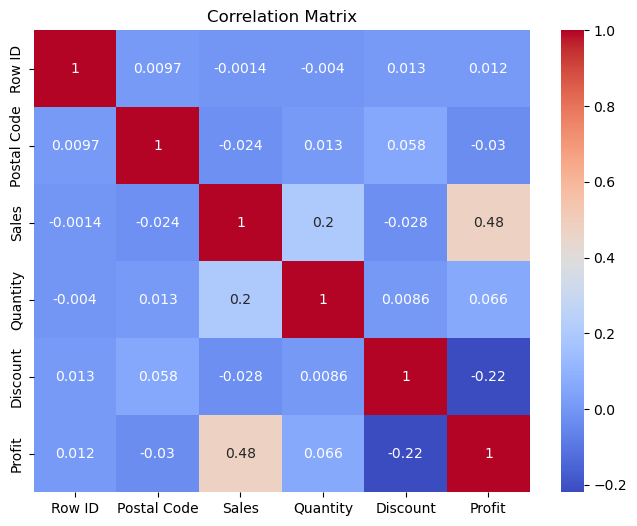

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


- Higher discounts negatively affect profits.
- There's a clear *negative correlation* between *discount* and *profit*.

**Sub-Category vs Sales and Profit**

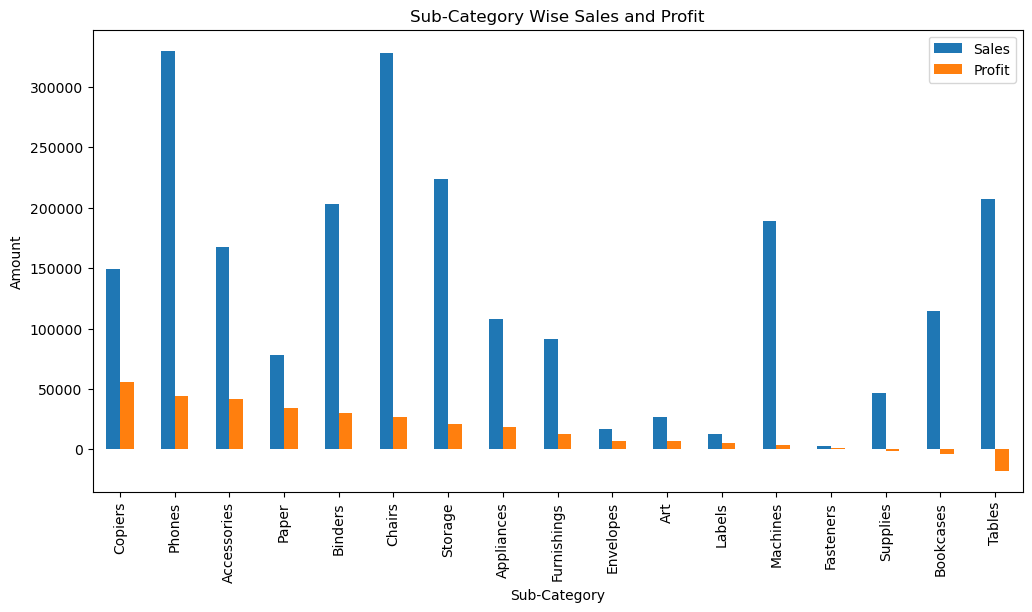

In [74]:
subcat_sales_profit = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
subcat_sales_profit.plot(kind='bar', figsize=(12,6))
plt.title('Sub-Category Wise Sales and Profit')
plt.ylabel('Amount')
plt.show()


- *Phones, **Chairs, and **Copiers* are high-profit sub-categories.
- *Tables* and *Bookcases* show negative profits.
- Consider reducing costs or discounts in those areas.

**Discount vs Profit(Scatter Plot)**

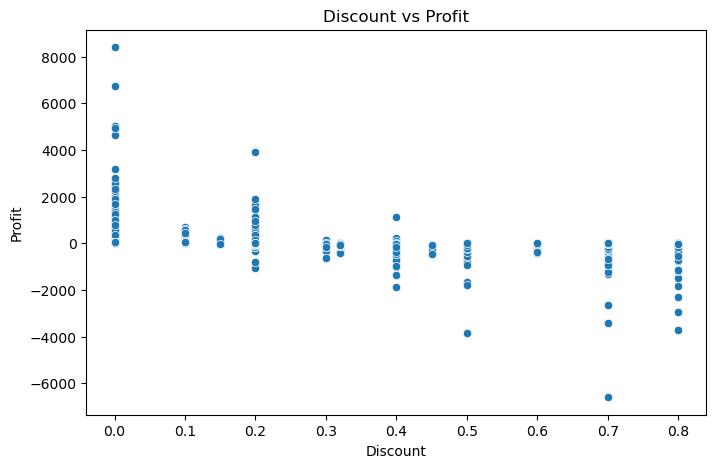

In [75]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.show()


**Time Series Analysis(Sales Trend by Month)**

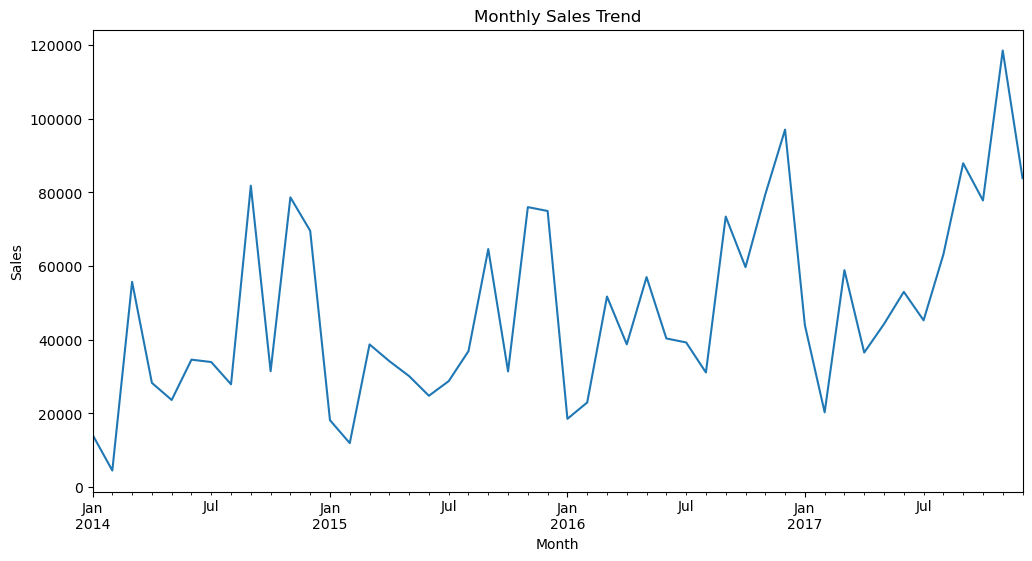

In [76]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

monthly_sales = df.resample('ME', on='Order Date')['Sales'].sum()
monthly_sales.plot(figsize=(12,6))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


Time Series Analysis:
- Sales show a clear seasonal pattern, with significant spikes during year-end months (October to   December) across multiple years.
- The highest sales occurred in December 2017, indicating a strong holiday or festive demand.
- There are noticeable dips during mid-year months (e.g., March–May), suggesting opportunities to boost off-season sales through targeted promotions.

Business Actions:
1. Increase inventory and marketing budget during Q4 (Oct–Dec) to maximize profits.
2. Launch promotional campaigns during slower months to balance sales distribution.


**RFM Analysis(Customer Segmentation)**

In [77]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
latest_date = df['Order Date'].max()

rfm = df.groupby('Customer Name').agg({
    'Order Date': lambda x: (latest_date - x.max()).days,
    'Order ID': 'count',
    'Sales': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head(10)


,Recency,Frequency,Monetary
Customer Name,,,
Aaron Bergman,415,6,886.156
Aaron Hawkins,12,11,1744.700
Aaron Smayling,88,10,3050.692
Adam Bellavance,54,18,7755.620
Adam Hart,34,20,3250.337
Adam Shillingsburg,28,25,3255.310
Adrian Barton,41,20,14473.571
Adrian Hane,60,16,1735.514
Adrian Shami,41,3,58.820


A small group of customers has high frequency and monetary value, indicating they are our most loyal and profitable customers.  
However, many customers with low recency and low frequency have not returned recently — suggesting a need for re-engagement marketing (like emails, discounts, or offers).


In [78]:
df['Profit Status'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
df['Profit Status']

0       1
1       1
2       1
3       0
4       1
       ..
9989    1
9990    1
9991    1
9992    1
9993    1
Name: Profit Status, Length: 9994, dtype: int64

## Conclusion

    Based on the retail sales data analysis, here are the final recommendations:

-  Higher discounts result in lower profits. Strategy should optimize discounting to avoid margin    loss.
-  Sales rise significantly in specific months (like November), indicating a seasonal trend.         Marketing and stock should be planned accordingly.
-  RFM analysis helped identify top customers. Business can run loyalty programs or personalized     offers for them.
-  Most profitable categories and regions can be focused more for better ROI.
-  Weak performing segments need review and improvement.

   This project demonstrates how data analytics helps businesses make better, data-driven            decisions.
